##Introdução ao Projeto de Modelagem de Crédito para uma Fintech

Neste projeto de modelagem de crédito para uma fintech, o objetivo é desenvolver modelos preditivos que possam avaliar o risco de crédito de potenciais clientes. Esses modelos são essenciais para garantir que a fintech tome decisões de concessão de crédito de forma eficaz e segura.

Antes de prosseguir com a construção dos modelos, é crucial entender o público-alvo e os dados disponíveis. Compreender o público-alvo ajudará a personalizar os modelos de acordo com as características e comportamentos dos clientes. Além disso, os dados disponíveis desempenham um papel fundamental na qualidade e na precisão dos modelos desenvolvidos.

Para este projeto, optei por trabalhar no ambiente do Google Colab e utilizar SQL através do Spark para manipulação e análise de dados em larga escala. O Spark é uma escolha robusta para lidar com conjuntos de dados distribuídos e oferece uma variedade de ferramentas para processamento de big data.

##Objetivo da Análise Exploratória de Dados (EDA):

O objetivo desta Análise Exploratória de Dados (EDA) é compreender melhor o perfil do público da PoD Bank, explorando as características e padrões presentes na base de dados. Através da EDA, buscamos identificar insights relevantes que possam informar o processo de modelagem de crédito, contribuindo para uma tomada de decisão mais fundamentada e eficaz. Ao analisar os dados de forma abrangente, buscamos entender as relações entre as variáveis e identificar possíveis tendências que possam impactar o desempenho dos modelos estatísticos.

## Apresentação do Case
A PoD Bank, uma startup no setor financeiro, estabeleceu uma sólida presença de mercado ao atender a população com escassa informação de crédito. Oferecendo crédito imobiliário, veicular e empréstimo pessoal, a empresa identificou a necessidade de aprimorar suas decisões de crédito, superando a dependência exclusiva do Business Intelligence (BI).

Para fortalecer sua abordagem, a PoD Bank optou por estabelecer uma área dedicada ao Planejamento e Modelagem de Crédito, focada na implementação de modelos estatísticos. Essa estratégia visa melhorar a análise de riscos e garantir uma tomada de decisão mais fundamentada. Reflete o compromisso contínuo da empresa em oferecer soluções de crédito inovadoras e sustentáveis.


## Configuração do Ambiente
Configuração do ambiente e ferramentas essenciais que foram instaladas para o início do projeto.

Neste projeto, utilizei o Apache Spark, uma poderosa ferramenta para processamento distribuído de dados, especialmente em grande escala.

- Instalação do Pacote PySpark:
Primeiramente, instalei o pacote PySpark, que é uma biblioteca Python para interagir com o Spark e realizar operações de processamento de dados distribuídas.

- Criação da Sessão Spark:
Em seguida, criei uma sessão Spark usando a classe SparkSession. Essa sessão é essencial para interagir com o ambiente Spark e executar operações de processamento de dados distribuídas.

- Pandas e NumPy para Manipulação de Dados:
Importei as bibliotecas Pandas e NumPy para lidar com a manipulação e análise de dados. Essas bibliotecas são essenciais para a limpeza, transformação e análise inicial dos dados de crédito.

- Visualização de Dados com Matplotlib e Seaborn:
Também incluí as bibliotecas Matplotlib e Seaborn para visualização de dados. Essas bibliotecas oferecem recursos poderosos para criar gráficos e plots que ajudam na compreensão dos padrões e tendências nos dados de crédito.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install -q pyspark

#Criando nossa primeira Sessão com o SparkSession
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("EDA - CREDITO") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

spark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


##Leitura do Dataset em Spark e Pandas.

In [4]:
df_application_train = spark.read.csv ('/content/drive/MyDrive/Colab Notebooks/AnaliseCredito/application_train.csv', header=True, inferSchema=True)
df_application_train.createOrReplaceTempView("df_application_train")

In [5]:
df_application_train = ('/content/drive/MyDrive/Colab Notebooks/AnaliseCredito/application_train.csv')
df_application_train = pd.read_csv(df_application_train,sep = ',')

## Dicionário dos Dados

`SK_ID_CURR` : ID do empréstimo na nossa amostra

`TARGET` : Variável alvo (1 - cliente com dificuldades de pagamento: ele/ela teve atraso de pagamento por mais de X dias em pelo menos uma das primeiras Y parcelas do empréstimo em nossa amostra, 0 - todos os outros casos)

`NAME_CONTRACT_TYPE` : Identificação se o empréstimo é em dinheiro ou rotativo

`CODE_GENDER` : Gênero do cliente

`FLAG_OWN_CAR` : Sinalizador se o cliente possui um carro

`FLAG_OWN_REALTY` : Sinalizador se o cliente possui uma casa ou apartamento

`CNT_CHILDREN` : Número de filhos que o cliente tem

`AMT_INCOME_TOTAL` : Renda do cliente

`AMT_CREDIT` : Valor do crédito do empréstimo

`AMT_ANNUITY` : Anuidade do empréstimo

`AMT_GOODS_PRICE` : Para empréstimos ao consumidor, é o preço dos bens para os quais o empréstimo é concedido

`NAME_TYPE_SUITE` : Quem acompanhava o cliente quando ele solicitou o empréstimo

`NAME_INCOME_TYPE` : Tipo de renda dos clientes (empresário, trabalhador, licença maternidade, ...)

`NAME_EDUCATION_TYPE` : Nível de educação mais alto que o cliente alcançou

`NAME_FAMILY_STATUS` : Estado civil do cliente

`NAME_HOUSING_TYPE`  : Qual é a situação habitacional do cliente (alugando, morando com os pais, ...)

`REGION_POPULATION_RELATIVE` : População normalizada da região onde o cliente mora (número mais alto significa que o cliente mora em uma região mais populosa)

`DAYS_BIRTH` : Idade do cliente em dias no momento da aplicação

`DAYS_EMPLOYED` : Quantos dias antes da aplicação a pessoa começou o emprego atual

`DAYS_REGISTRATION` : Quantos dias antes da aplicação o cliente mudou seu registro

`DAYS_ID_PUBLISH` : Quantos dias antes da aplicação o cliente mudou o documento de identidade com o qual solicitou o empréstimo

`OWN_CAR_AGE` : Idade do carro do cliente

`FLAG_MOBIL` : O cliente forneceu telefone celular (1=SIM, 0=NÃO)

`FLAG_EMP_PHONE` : O cliente forneceu telefone comercial (1=SIM, 0=NÃO)

`FLAG_WORK_PHONE` : O cliente forneceu telefone residencial (1=SIM, 0=NÃO)

`FLAG_CONT_MOBILE` : O telefone celular do cliente era acessível (1=SIM, 0=NÃO)

`FLAG_PHONE` : O cliente forneceu telefone residencial (1=SIM, 0=NÃO)

`FLAG_EMAIL` : O cliente forneceu e-mail (1=SIM, 0=NÃO)

`OCCUPATION_TYPE` : Qual tipo de ocupação o cliente tem

`CNT_FAM_MEMBERS` : Quantos membros a família do cliente tem

`REGION_RATING_CLIENT` : Nossa classificação da região onde o cliente mora (1,2,3)

`REGION_RATING_CLIENT_W_CITY` : Nossa classificação da região onde o cliente mora, levando em consideração a cidade (1,2,3)

`WEEKDAY_APPR_PROCESS_START` : Em qual dia da semana o cliente solicitou o empréstimo

`HOUR_APPR_PROCESS_START` : Aproximadamente em que hora o cliente solicitou o empréstimo

`REG_REGION_NOT_LIVE_REGION` : Sinalizador se o endereço permanente do cliente não corresponde ao endereço de contato (1=diferente, 0=igual, no nível regional)

`REG_REGION_NOT_WORK_REGION` : Sinalizador se o endereço permanente do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível regional)

`LIVE_REGION_NOT_WORK_REGION` : Sinalizador se o endereço de contato do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível regional)

`REG_CITY_NOT_LIVE_CITY` : Sinalizador se o endereço permanente do cliente não corresponde ao endereço de contato (1=diferente, 0=igual, no nível da cidade)

`REG_CITY_NOT_WORK_CITY` : Sinalizador se o endereço permanente do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível da cidade)

`LIVE_CITY_NOT_WORK_CITY` : Sinalizador se o endereço de contato do cliente não corresponde ao endereço de trabalho (1=diferente, 0=igual, no nível da cidade)

`ORGANIZATION_TYPE` : Tipo de organização onde o cliente trabalha

`EXT_SOURCE_1` : Pontuação normalizada de fonte de dados externa

`EXT_SOURCE_2` : Pontuação normalizada de fonte de dados externa

`EXT_SOURCE_3` : Pontuação normalizada de fonte de dados externa

`APARTMENTS_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`BASEMENTAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BEGINEXPLUATATION_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BUILD_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`COMMONAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ELEVATORS_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ENTRANCES_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMAX_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMIN_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LANDAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAPARTMENTS_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAPARTMENTS_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAREA_AVG` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`APARTMENTS_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`BASEMENTAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BEGINEXPLUATATION_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BUILD_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`COMMONAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ELEVATORS_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ENTRANCES_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMAX_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMIN_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LANDAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAPARTMENTS_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAPARTMENTS_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`APARTMENTS_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`BASEMENTAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BEGINEXPLUATATION_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora, qual é o tamanho médio (_AVG), moda (_MODE), tamanho mediano (_MEDI) do apartamento, área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`YEARS_BUILD_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`COMMONAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ELEVATORS_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`ENTRANCES_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMAX_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FLOORSMIN_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LANDAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAPARTMENTS_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`LIVINGAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAPARTMENTS_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`NONLIVINGAREA_MEDI` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`FONDKAPREMONT_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`HOUSETYPE_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`TOTALAREA_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`WALLSMATERIAL_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`EMERGENCYSTATE_MODE` : Informações normalizadas sobre o prédio onde o cliente mora. Qual é o tamanho médio do apartamento (sufixo _AVG), moda (sufixo _MODE), tamanho mediano (sufixo _MEDI), área comum, área de estar, idade do prédio, número de elevadores, número de entradas, estado do prédio, número de andares

`OBS_30_CNT_SOCIAL_CIRCLE` : Quantas observações do círculo social do cliente são observáveis com 30 DPD (dias de atraso)

`DEF_30_CNT_SOCIAL_CIRCLE` : Quantas observações do círculo social do cliente entraram em default em 30 DPD (dias de atraso)

`OBS_60_CNT_SOCIAL_CIRCLE` : Quantas observações do círculo social do cliente são observáveis com 60 DPD (dias de atraso)

`DEF_60_CNT_SOCIAL_CIRCLE` : Quantas observações do círculo social do cliente entraram em default em 60 DPD (dias de atraso)

`DAYS_LAST_PHONE_CHANGE` : Quantos dias antes da aplicação o cliente mudou de telefone

`FLAG_DOCUMENT_2` : O cliente forneceu o documento 2

`FLAG_DOCUMENT_3` : O cliente forneceu o documento 3

`FLAG_DOCUMENT_4` : O cliente forneceu o documento 4

`FLAG_DOCUMENT_5`: O cliente forneceu o documento 5

`FLAG_DOCUMENT_6` : O cliente forneceu o documento 6

`FLAG_DOCUMENT_7` : O cliente forneceu o documento 7

`FLAG_DOCUMENT_8` : O cliente forneceu o documento 8

`FLAG_DOCUMENT_9` : O cliente forneceu o documento 9

`FLAG_DOCUMENT_10` : O cliente forneceu o documento 10

`FLAG_DOCUMENT_11` : O cliente forneceu o documento 11

`FLAG_DOCUMENT_12` : O cliente forneceu o documento 12

`FLAG_DOCUMENT_13` : O cliente forneceu o documento 13

`FLAG_DOCUMENT_14` : O cliente forneceu o documento 14

`FLAG_DOCUMENT_15` : O cliente forneceu o documento 15

`FLAG_DOCUMENT_16` : O cliente forneceu o documento 16

`FLAG_DOCUMENT_17` : O cliente forneceu o documento 17

`FLAG_DOCUMENT_18` : O cliente forneceu o documento 18

`FLAG_DOCUMENT_19` : O cliente forneceu o documento 19

`FLAG_DOCUMENT_20` : O cliente forneceu o documento 20

`FLAG_DOCUMENT_21` : O cliente forneceu o documento 21

`AMT_REQ_CREDIT_BUREAU_HOUR` : Número de consultas ao Credit Bureau sobre o cliente uma hora antes da aplicação

`AMT_REQ_CREDIT_BUREAU_DAY` : Número de consultas ao Credit Bureau sobre o cliente um dia antes da aplicação (excluindo uma hora antes da aplicação)

`AMT_REQ_CREDIT_BUREAU_WEEK` : Número de consultas ao Credit Bureau sobre o cliente uma semana antes da aplicação (excluindo um dia antes da aplicação)

`AMT_REQ_CREDIT_BUREAU_MON` : Número de consultas ao Credit Bureau sobre o cliente um mês antes da aplicação (excluindo uma semana antes da aplicação)

`AMT_REQ_CREDIT_BUREAU_QRT` : Número de consultas ao Credit Bureau sobre o cliente 3 meses antes da aplicação (excluindo um mês antes da aplicação)

`AMT_REQ_CREDIT_BUREAU_YEAR` : Número de consultas ao Credit Bureau sobre o cliente um ano antes (excluindo os últimos 3 meses antes da aplicação)

Deletei algumas colunas que julguei não ser necessária para está primeira etapa de análise exploratória dos dados.

In [6]:
# Lista das colunas a serem excluídas
colunas_a_excluir = [
    "APARTMENTS_AVG",
    "BASEMENTAREA_AVG",
    "YEARS_BEGINEXPLUATATION_AVG",
    "YEARS_BUILD_AVG",
    "COMMONAREA_AVG",
    "ELEVATORS_AVG",
    "ENTRANCES_AVG",
    "FLOORSMAX_AVG",
    "FLOORSMIN_AVG",
    "LANDAREA_AVG",
    "LIVINGAPARTMENTS_AVG",
    "LIVINGAREA_AVG",
    "NONLIVINGAPARTMENTS_AVG",
    "NONLIVINGAREA_AVG",
    "APARTMENTS_MODE",
    "BASEMENTAREA_MODE",
    "YEARS_BEGINEXPLUATATION_MODE",
    "YEARS_BUILD_MODE",
    "COMMONAREA_MODE",
    "OWN_CAR_AGE",
    "ELEVATORS_MODE",
    "ENTRANCES_MODE",
    "FLOORSMAX_MODE",
    "FLOORSMIN_MODE",
    "LANDAREA_MODE",
    "LIVINGAPARTMENTS_MODE",
    "LIVINGAREA_MODE",
    "NONLIVINGAPARTMENTS_MODE",
    "NONLIVINGAREA_MODE",
    "APARTMENTS_MEDI",
    "BASEMENTAREA_MEDI",
    "YEARS_BEGINEXPLUATATION_MEDI",
    "YEARS_BUILD_MEDI",
    "COMMONAREA_MEDI",
    "ELEVATORS_MEDI",
    "ENTRANCES_MEDI",
    "FLOORSMAX_MEDI",
    "FLOORSMIN_MEDI",
    "LANDAREA_MEDI",
    "LIVINGAPARTMENTS_MEDI",
    "LIVINGAREA_MEDI",
    "NONLIVINGAPARTMENTS_MEDI",
    "NONLIVINGAREA_MEDI",
    "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE",
    "TOTALAREA_MODE",
    "WALLSMATERIAL_MODE",
    "EMERGENCYSTATE_MODE",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE",
    "DAYS_LAST_PHONE_CHANGE",
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10",
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21"
]

# DataFrame resultante com as colunas excluídas
df_application_train_01 = df_application_train.drop(columns=colunas_a_excluir)

 #Salvar o DataFrame resultante em um novo arquivo, se necessário
#df_application_train_01.to_csv("application_train_01.csv", index=False)

In [7]:
df_application_train_01 = df_application_train.copy()

In [8]:
df_application_train_01 = spark.read.csv ('/content/drive/MyDrive/Colab Notebooks/AnaliseCredito/application_train_01.csv', header=True, inferSchema=True)
df_application_train_01.createOrReplaceTempView("df_application_train_01")

In [9]:
df_application_train_01 = ('/content/drive/MyDrive/Colab Notebooks/AnaliseCredito/application_train_01.csv')
df_application_train_01 = pd.read_csv(df_application_train_01,sep = ',')

## Metadados

In [11]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

generate_metadata(df_application_train_01)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,SK_ID_CURR,int64,0,0.00,215257
1,FLAG_MOBIL,int64,0,0.00,2
2,FLAG_EMP_PHONE,int64,0,0.00,2
3,FLAG_WORK_PHONE,int64,0,0.00,2
4,FLAG_CONT_MOBILE,int64,0,0.00,2
...,...,...,...,...,...
94,NAME_HOUSING_TYPE,object,0,0.00,6
95,OCCUPATION_TYPE,object,67409,31.32,18
96,ORGANIZATION_TYPE,object,0,0.00,58
97,NAME_TYPE_SUITE,object,913,0.42,7


## Análise Exploratória de Dados (EDA)

In [14]:
df_application_train_01.printSchema()

root
 |-- SK_ID_CURR: integer (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- AMT_GOODS_PRICE: double (nullable = true)
 |-- NAME_TYPE_SUITE: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- REGION_POPULATION_RELATIVE: double (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- DAYS_REGISTRATION: double (nullable = true)
 |-- DAYS_ID_PUBLISH: integer (nullable = true)
 |-- FLAG_MOBIL

In [15]:
df_application_train_01.show(10,False)

+----------+------+------------------+-----------+------------+---------------+------------+----------------+----------+-----------+---------------+---------------+--------------------+-----------------------------+--------------------+-------------------+--------------------------+----------+-------------+-----------------+---------------+----------+--------------+---------------+----------------+----------+----------+---------------------+---------------+--------------------+---------------------------+--------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+----------------------+------------------+------------------+------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+------------------+------------------+----------

#### Análise Estatística das Variáveis Numéricas

In [19]:
numeric_columns = [col_name for col_name, col_type in df_application_train_01.dtypes if col_type in ['int', 'double']]
df_numeric_summary = df_application_train_01.select(numeric_columns).describe()
df_numeric_summary.show()

+-------+------------------+-------------------+-------------------+------------------+------------------+-----------------+-----------------+--------------------------+-------------------+------------------+------------------+------------------+--------------------+-------------------+-------------------+--------------------+-------------------+-------------------+------------------+--------------------+---------------------------+-----------------------+--------------------------+--------------------------+---------------------------+----------------------+----------------------+-----------------------+-------------------+--------------------+-------------------+--------------------------+-------------------------+--------------------------+-------------------------+-------------------------+--------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+

###Quantidade de contratos na base de dados

In [20]:
spark.sql("""
select
  count(SK_ID_CURR) as COUNT_ID
from
  df_application_train_01
""").show()

+--------+
|COUNT_ID|
+--------+
|  215257|
+--------+



###Análise da Variável Target

Conduzi uma consulta SQL para a variável `TARGET` que determina a porcentagem de "bons" e "maus" clientes na base de dados. Visualizei os resultados usando gráfico de pizza, que forneceu uma representação visual da distribuição das classes da variável target.

In [ ]:
resultado_target=spark.sql("""
select
  TARGET,
  count(*) as TOTAL,
  round(count(*)* 100/ (select count(*)from df_application_train_01),2) as PORCENTAGEM
from
  df_application_train_01
group by
  TARGET;
""").show()

+------+------+-----------+
|TARGET| TOTAL|PORCENTAGEM|
+------+------+-----------+
|     1| 17412|       8.09|
|     0|197845|      91.91|
+------+------+-----------+



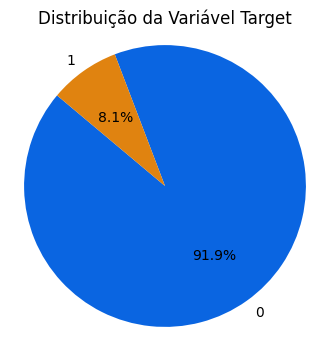

In [ ]:
# Contar os valores únicos da variável target
contagem_target = df_application_train_01['TARGET'].value_counts()

# Preparar os dados para o gráfico de pizza
labels = contagem_target.index
sizes = contagem_target.values

# Cores personalizadas
cores = '#0A65E1','#E08310'

# Criar o gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title('Distribuição da Variável Target')
plt.axis('equal')  # Garante que o gráfico seja um círculo
plt.show()


Na base de dados, a maioria dos clientes é classificada como "bons pagadores", representando aproximadamente 91,9% do total (TARGET 0), enquanto cerca de 8,9% são identificados como "maus pagadores" (TARGET 1).

### Análise da Variável Idade

In [ ]:
spark.sql("""
select
    min(round(abs(DAYS_BIRTH) / 365, 2)) as MIN_IDADE,
    round(avg(round(abs(DAYS_BIRTH) / 365, 2)),2) as MEDIA_IDADE,
    max(round(abs(DAYS_BIRTH) / 365, 2)) as MAX_IDADE
from
    df_application_train_01
""").show()


+---------+-----------+---------+
|MIN_IDADE|MEDIA_IDADE|MAX_IDADE|
+---------+-----------+---------+
|    20.52|      43.93|    69.12|
+---------+-----------+---------+



####Análise da Relação da Idade com Target

Essa consulta analisa a distribuição da idade dos clientes em diferentes faixas etárias, segmentando-os de acordo com o target. O objetivo é entender como a idade dos clientes está relacionada à probabilidade de inadimplência.

In [38]:
df_idade_target = spark.sql("""
select
  TARGET,
   case
        when AGE >= 20 and age < 30 then '20-29'
        when AGE >= 30 and age < 40 then '30-39'
        when AGE >= 40 and age < 50 then '40-49'
        when AGE >= 50 and age < 60 then '50-59'
        else '60+'
    end as FAIXA_IDADE,
    count(*) as QUANT_CLIENTES
from (
    select
        TARGET,
        round(abs(DAYS_BIRTH) / 365) as AGE
    from
        df_application_train_01
) temp
group by
    TARGET,
    FAIXA_IDADE
order by
    TARGET,
    FAIXA_IDADE
""")
df_idade_target.show()


+------+-----------+--------------+
|TARGET|FAIXA_IDADE|QUANT_CLIENTES|
+------+-----------+--------------+
|     0|      20-29|         25480|
|     0|      30-39|         51817|
|     0|      40-49|         49968|
|     0|      50-59|         44753|
|     0|        60+|         25827|
|     1|      20-29|          3337|
|     1|      30-39|          5558|
|     1|      40-49|          4218|
|     1|      50-59|          2936|
|     1|        60+|          1363|
+------+-----------+--------------+



####Visualização da Idade por Faixa para o Target 1

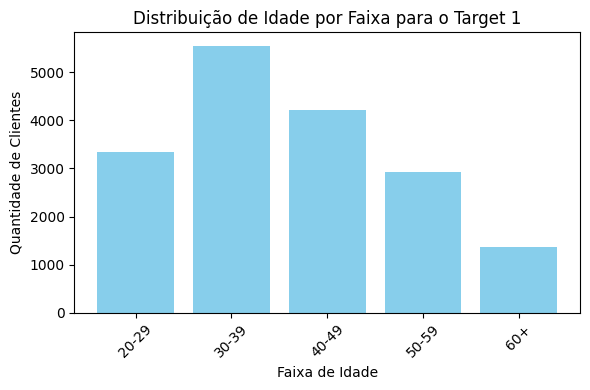

In [39]:
# Filtrar os dados para o alvo 1
df_idade_target1 = df_idade_target.filter(df_idade_target['TARGET'] == 1)

# Extrair os dados do DataFrame
faixas_idade = df_idade_target1.select('FAIXA_IDADE').rdd.flatMap(lambda x: x).collect()
quantidades_clientes = df_idade_target1.select('QUANT_CLIENTES').rdd.flatMap(lambda x: x).collect()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(faixas_idade, quantidades_clientes, color='skyblue')
plt.xlabel('Faixa de Idade')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição de Idade por Faixa para o Target 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A faixa etária mais comum entre os clientes inadimplentes está entre 30 e 39 anos, com um total de 5.558 clientes.

As faixas etárias seguintes em ordem de quantidade decrescente são 40-49 anos (4.218 clientes), 20-29 anos (3.337 clientes), 50-59 anos (2.936 clientes) e 60+ anos (1.363 clientes).

Isso sugere que os clientes na faixa etária de 30 a 39 anos são os mais frequentemente associados à inadimplência, o que pode indicar um segmento demográfico com maior risco de não pagamento.

###Análise da Variável Tipo de Contrato

In [ ]:
Tipo_Contrato= spark.sql("""
select
  NAME_CONTRACT_TYPE,
  count(*) as tipo_contrato,
  round(count(*)* 100/ (select count(*)from df_application_train),2) as PORCENTAGEM
from
  df_application_train_01
group by
  NAME_CONTRACT_TYPE;
""")
Tipo_Contrato.show()

+------------------+-------------+-----------+
|NAME_CONTRACT_TYPE|tipo_contrato|PORCENTAGEM|
+------------------+-------------+-----------+
|   Revolving loans|        20594|       9.57|
|        Cash loans|       194663|      90.43|
+------------------+-------------+-----------+



####Visualização da Variável Tipo de Contrato

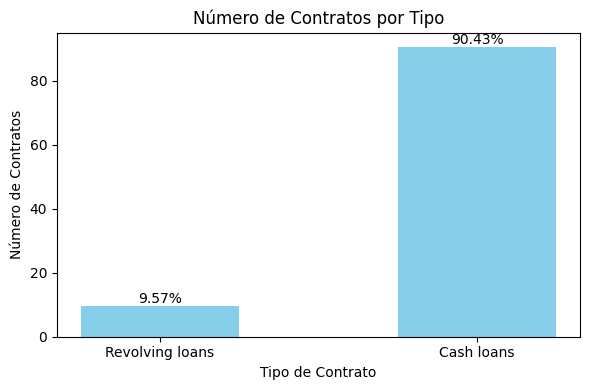

In [ ]:
# Obter os resultados da consulta
df_resultados = Tipo_Contrato.toPandas()

# Criar o gráfico de barras
plt.figure(figsize=(6, 4))
barras = plt.bar(df_resultados['NAME_CONTRACT_TYPE'], df_resultados['PORCENTAGEM'], color='skyblue',width=0.5)

# Adicionar as porcentagens em cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura}%', ha='center', va='bottom')

# Definir rótulos e título
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Contratos')
plt.title('Número de Contratos por Tipo')

# Ajustar o layout
plt.xticks(rotation=0)
plt.tight_layout()

# Exibir o gráfico
plt.show()

####Análise da Relação entre Tipo de Contrato e Target

A consulta abaixo apresenta os resultados da análise da relação entre o tipo de contrato e o target. Ela conta o número de ocorrências para cada combinação de tipo de contrato e target, além de calcular a porcentagem de cada combinação em relação ao total de ocorrências para cada tipo de contrato.

O gráfico de barras abaixo representa visualmente os resultados da análise.

In [ ]:
df_contrato_target = spark.sql("""
select
    NAME_CONTRACT_TYPE,
    TARGET,
    count(*) as QUANT_CLIENTES,
    round(count(*) * 100 / sum(count(*)) over (partition by NAME_CONTRACT_TYPE), 2) as PORCENTAGEM
from
    df_application_train_01
group by
    NAME_CONTRACT_TYPE,
    TARGET
""")
df_contrato_target.show()

+------------------+------+--------------+-----------+
|NAME_CONTRACT_TYPE|TARGET|QUANT_CLIENTES|PORCENTAGEM|
+------------------+------+--------------+-----------+
|        Cash loans|     0|        178371|      91.63|
|        Cash loans|     1|         16292|       8.37|
|   Revolving loans|     1|          1120|       5.44|
|   Revolving loans|     0|         19474|      94.56|
+------------------+------+--------------+-----------+



####Visualização da Variável Tipo de Contrato em Relação ao Target

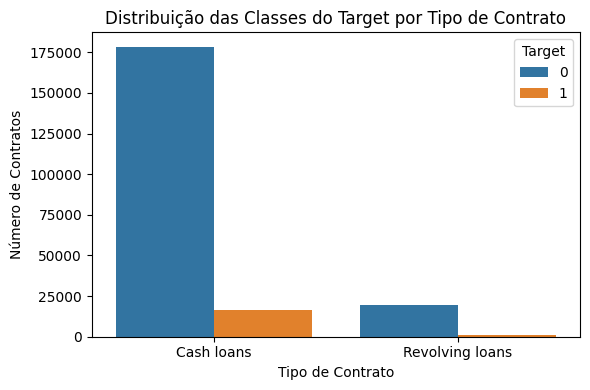

In [ ]:
# Converter o DataFrame Spark para um DataFrame Pandas
df_pandas = df_contrato_target.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(data=df_pandas, x='NAME_CONTRACT_TYPE', y='QUANT_CLIENTES', hue='TARGET')

# Definir rótulos e título
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Contratos')
plt.title('Distribuição das Classes do Target por Tipo de Contrato')

# Mostrar o gráfico
plt.xticks(rotation=0)
plt.legend(title='Target', loc='upper right')
plt.tight_layout()
plt.show()

Distribuição por Tipo de Contrato de Empréstimo e Status do Cliente:

A maioria dos clientes possui empréstimos do tipo "Cash loans" em comparação com "Revolving loans".
Para ambos os tipos de empréstimos, a grande maioria dos clientes tem status "0" (sem inadimplência), representando 91.63% para "Cash loans" e 94.56% para "Revolving loans".
No entanto, o percentual de clientes com inadimplência é significativamente maior para "Cash loans" (8.37%) em comparação com "Revolving loans" (5.44%).

###Análise da Variável Renda Total

Essa consulta analise a media, minimo maximo da renda do cliente, retirando um missing values de '1.35E7'

In [ ]:
spark.sql("""
select
    round(avg(AMT_INCOME_TOTAL),2) as MED_RENDA,
    round(min(AMT_INCOME_TOTAL),2) as MIN_RENDA,
    round(max(AMT_INCOME_TOTAL),2) as MAX_RENDA
from
    df_application_train_01
where
    AMT_INCOME_TOTAL != '1.35E7'
""").show()

+---------+---------+---------+
|MED_RENDA|MIN_RENDA|MAX_RENDA|
+---------+---------+---------+
|168494.92|  25650.0|9000000.0|
+---------+---------+---------+



####Visualização da Relação entre Renda Total e Target

O boxplot abaixo representa a relação entre a renda total e o target. Ele mostra a distribuição da renda total para os grupos de clientes classificados como "Bons" (0) e "Maus" (1), de acordo com o target.

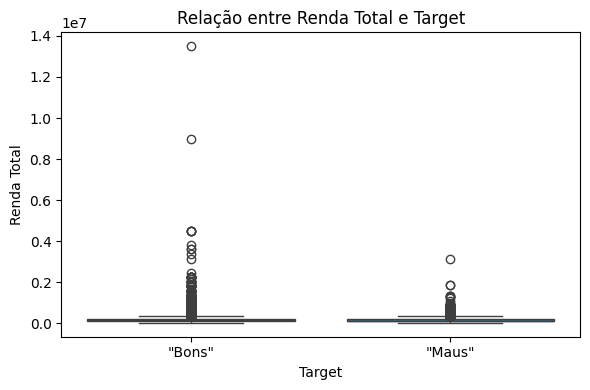

In [ ]:
# Filtrar o DataFrame para excluir o valor 1.35E7 na coluna 'AMT_INCOME_TOTAL'
df_application_train_01 = df_application_train_01[df_application_train_01['AMT_INCOME_TOTAL'] != 1.35E7]

# Criar o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_application_train, x='TARGET', y='AMT_INCOME_TOTAL')

# Definir rótulos e título
plt.xlabel('Target')
plt.ylabel('Renda Total')
plt.title('Relação entre Renda Total e Target')

# Mostrar o gráfico
plt.xticks(ticks=[0, 1], labels=['"Bons"', '"Maus"'])
plt.tight_layout()
plt.show()

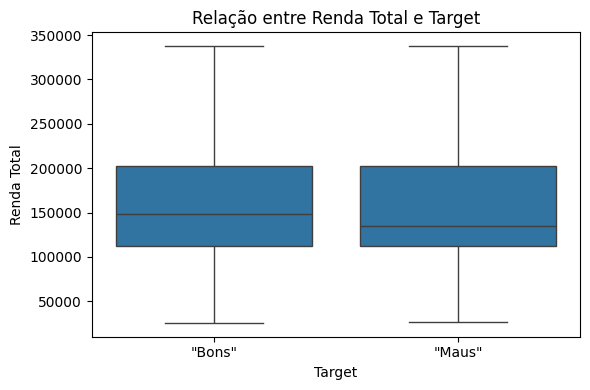

In [ ]:
# Filtrar o DataFrame para excluir o valor 1.35E7 na coluna 'AMT_INCOME_TOTAL'
df_application_train_01 = df_application_train_01[df_application_train_01['AMT_INCOME_TOTAL'] != 1.35E7]

# Criar o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_application_train, x='TARGET', y='AMT_INCOME_TOTAL', showfliers=False)

# Definir rótulos e título
plt.xlabel('Target')
plt.ylabel('Renda Total')
plt.title('Relação entre Renda Total e Target')

# Mostrar o gráfico
plt.xticks(ticks=[0, 1], labels=['"Bons"', '"Maus"'])
plt.tight_layout()
plt.show()



No primeiro boxplot, observamos a presença de outliers nos clientes classificados como 'bons', indicando uma dispersão incomum nos valores de renda total para esse grupo. Esses outliers podem representar casos extremos de renda entre os clientes 'bons', que se destacam significativamente em relação à maioria.

No segundo boxplot, após a remoção dos outliers, podemos observar que a mediana da renda total para os clientes 'bons' está acima da mediana dos clientes 'maus'. Isso sugere que, em geral, os clientes classificados como 'bons' tendem a ter uma renda total mais alta em comparação com os clientes 'maus', conforme representado pela posição da mediana nos boxplots."

####Análise da Relação entre Renda Total por faixa e Target

In [46]:
df_renda_target = spark.sql("""
select
    case
        when AMT_INCOME_TOTAL <= 50000 then 'faixa 1: até 50.000'
        when AMT_INCOME_TOTAL <= 100000 then 'faixa 2: 50.001 - 100.000'
        when AMT_INCOME_TOTAL <= 150000 then 'faixa 3: 100.001 - 150.000'
        when AMT_INCOME_TOTAL <= 200000 then 'faixa 4: 150.001 - 200.000'
        else 'faixa 5: mais de 200.000'
    end as FAIXA_RENDA,
    TARGET,
    count(*) as QUANT_CLIENTES
from
    df_application_train_01
group by
    case
        when AMT_INCOME_TOTAL <= 50000 then 'faixa 1: até 50.000'
        when AMT_INCOME_TOTAL <= 100000 then 'faixa 2: 50.001 - 100.000'
        when AMT_INCOME_TOTAL <= 150000 then 'faixa 3: 100.001 - 150.000'
        when AMT_INCOME_TOTAL <= 200000 then 'faixa 4: 150.001 - 200.000'
        else 'faixa 5: mais de 200.000'
    end,
    TARGET
order by
    FAIXA_RENDA;
""")
df_renda_target.show()

+--------------------+------+--------------+
|         FAIXA_RENDA|TARGET|QUANT_CLIENTES|
+--------------------+------+--------------+
| faixa 1: até 50.000|     0|          2905|
| faixa 1: até 50.000|     1|           240|
|faixa 2: 50.001 -...|     0|         38123|
|faixa 2: 50.001 -...|     1|          3411|
|faixa 3: 100.001 ...|     0|         58655|
|faixa 3: 100.001 ...|     1|          5526|
|faixa 4: 150.001 ...|     1|          3854|
|faixa 4: 150.001 ...|     0|         40898|
|faixa 5: mais de ...|     1|          4381|
|faixa 5: mais de ...|     0|         57264|
+--------------------+------+--------------+



####Visualização da Variável Renda Total por Faixa e a Relação com Target

<Figure size 1000x600 with 0 Axes>

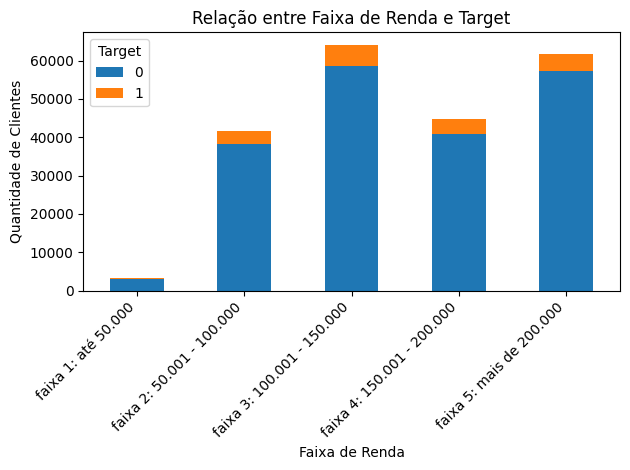

In [43]:
# Converter o resultado da consulta em um DataFrame Pandas
df_pandas = df_renda_target.toPandas()

# Pivotar os dados para ter as faixas de renda como colunas
df_pivot = df_pandas.pivot(index='FAIXA_RENDA', columns='TARGET', values='QUANT_CLIENTES')

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', stacked=True)

# Adicionar rótulos e título
plt.xlabel('Faixa de Renda')
plt.ylabel('Quantidade de Clientes')
plt.title('Relação entre Faixa de Renda e Target')

# Exibir o gráfico
plt.xticks(rotation=45, ha='right')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

###Análise da Variável Posse de Carro pelo Cliente

In [ ]:
spark.sql("""
select
    FLAG_OWN_CAR as POSSUI_CARRO,
    count(*) as CLIENTES,
    round(count(*)* 100/ (select count(*)from df_application_train_01),2) as PORCENTAGEM
from
    df_application_train_01
group by
    FLAG_OWN_CAR;
""").show()

+------------+--------+-----------+
|POSSUI_CARRO|CLIENTES|PORCENTAGEM|
+------------+--------+-----------+
|           Y|   73425|      34.11|
|           N|  141832|      65.89|
+------------+--------+-----------+



#### Análise da Posse de Carro pelo Cliente e a Relação com Target

In [ ]:
df_carro_target = spark.sql("""
select
    TARGET,
    FLAG_OWN_CAR as POSSUI_CARRO,
    count(*) as CLIENTES,
    round(count(*) * 100 / sum(count(*)) over (partition by FLAG_OWN_CAR), 2) as PORCENTAGEM
from
    df_application_train_01
group by
    TARGET,
    FLAG_OWN_CAR;
""")
df_carro_target.show()

+------+------------+--------+-----------+
|TARGET|POSSUI_CARRO|CLIENTES|PORCENTAGEM|
+------+------------+--------+-----------+
|     0|           N|  129720|      91.46|
|     1|           N|   12112|       8.54|
|     0|           Y|   68125|      92.78|
|     1|           Y|    5300|       7.22|
+------+------------+--------+-----------+



A posse de carro parece não ter uma influência na taxa de inadimplência dos clientes. Tanto entre aqueles que possuem carro quanto entre os que não possuem, a maioria são classificados como "bons" pagadores. No entanto, a proporção de inadimplentes é ligeiramente menor entre os clientes que possuem carro em comparação com aqueles que não possuem.

####Visualização da Variável Posse de Carro e a Relação com Target

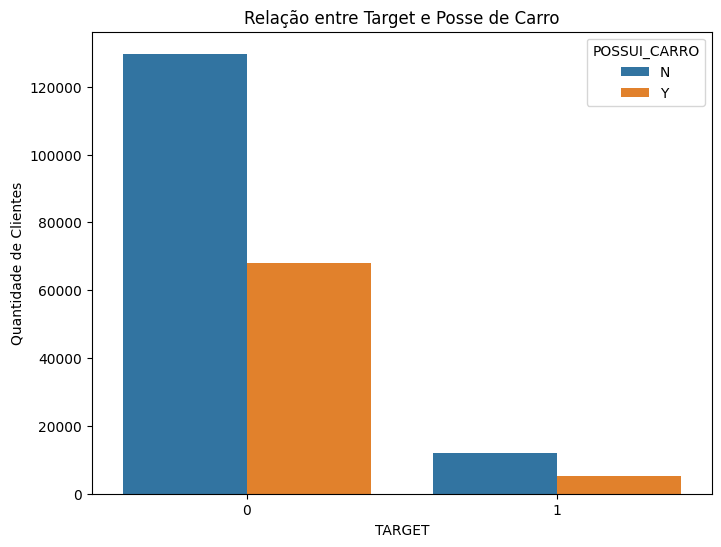

In [ ]:
# Converter o DataFrame do Spark para um DataFrame do Pandas
df_pd = df_carro_target.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=df_pd, x='TARGET', y='CLIENTES', hue='POSSUI_CARRO')
plt.xlabel('TARGET')
plt.ylabel('Quantidade de Clientes')
plt.title('Relação entre Target e Posse de Carro')
plt.show()


###Análise da Variável Posse de Imóvel pelo Cliente

In [ ]:
spark.sql("""
select
    FLAG_OWN_REALTY as POSSUI_IMOVEL,
    count(*) as CLIENTES,
    round(count(*)* 100/ (select count(*)from df_application_train_01),2) as PORCENTAGEM
from
    df_application_train
group by
   FLAG_OWN_REALTY;
""").show()

+-------------+--------+-----------+
|POSSUI_IMOVEL|CLIENTES|PORCENTAGEM|
+-------------+--------+-----------+
|            Y|  149519|      69.46|
|            N|   65738|      30.54|
+-------------+--------+-----------+



####Análise da Posse de Imóvel pelo Cliente e a Relação com Target

In [ ]:
df_imovel_target = spark.sql("""
select
    TARGET,
    FLAG_OWN_REALTY as POSSUI_IMOVEL,
    count(*) as CLIENTES,
     round(count(*) * 100 / sum(count(*)) over (partition by FLAG_OWN_REALTY), 2) as PORCENTAGEM
from
    df_application_train
group by
    TARGET,
    FLAG_OWN_REALTY;
""")
df_imovel_target.show()


+------+-------------+--------+-----------+
|TARGET|POSSUI_IMOVEL|CLIENTES|PORCENTAGEM|
+------+-------------+--------+-----------+
|     0|            N|   60234|      91.63|
|     1|            N|    5504|       8.37|
|     0|            Y|  137611|      92.04|
|     1|            Y|   11908|       7.96|
+------+-------------+--------+-----------+



Tanto entre os clientes que possuem imóvel quanto entre os que não possuem, a maioria é classificada como "bons" pagadores.

No entanto, a proporção de inadimplentes é ligeiramente menor entre os clientes que possuem imóvel (7.96%) em comparação com aqueles que não possuem (8.37%).

####Visualização da Variável Posse de Imóvel pelo Cliente e a Relação com Target

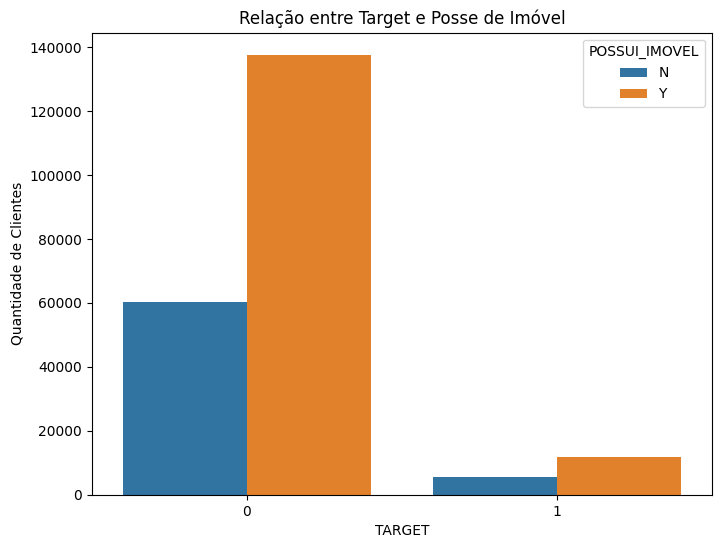

In [ ]:
# Converter o DataFrame do Spark para um DataFrame do Pandas
df_pd01 = df_imovel_target.toPandas()

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(data=df_pd, x='TARGET', y='CLIENTES', hue='POSSUI_IMOVEL')
plt.xlabel('TARGET')
plt.ylabel('Quantidade de Clientes')
plt.title('Relação entre Target e Posse de Imóvel')
plt.show()

###Análise da Quantidade de Filhos por Cliente

In [ ]:
spark.sql("""
select
  CNT_CHILDREN as QUANT_FILHOS,
  count(*) AS QUANT_CLIENTES,
  round(count(*)* 100/ (select count(*)from df_application_train_01),2) as PORCENTAGEM
from
  df_application_train
group by
  CNT_CHILDREN
order by
  QUANT_FILHOS;
""").show()

+------------+--------------+-----------+
|QUANT_FILHOS|QUANT_CLIENTES|PORCENTAGEM|
+------------+--------------+-----------+
|           0|        150712|      70.01|
|           1|         42855|      19.91|
|           2|         18775|       8.72|
|           3|          2546|       1.18|
|           4|           287|       0.13|
|           5|            54|       0.03|
|           6|            14|       0.01|
|           7|             5|        0.0|
|           8|             1|        0.0|
|           9|             2|        0.0|
|          10|             2|        0.0|
|          11|             1|        0.0|
|          14|             2|        0.0|
|          19|             1|        0.0|
+------------+--------------+-----------+



A maioria dos clientes (aproximadamente 70,01%) na base de dados não tem filhos, enquanto quase 20% têm apenas um filho. A quantidade de clientes diminui progressivamente à medida que o número de filhos aumenta, com uma porcentagem muito pequena de clientes (menos de 1,5% no total) tendo três ou mais filhos.

###Análise da Variável Nivel de Educação

In [ ]:
spark.sql("""
select
    NAME_EDUCATION_TYPE,
    count (*) as QUANTIDADE_CLIENTES,
    round(count(*) * 100 / (select count(*) from df_application_train), 2) as PORCENTAGEM
from
    df_application_train_01
group by
    NAME_EDUCATION_TYPE
""").show()

+--------------------+-------------------+-----------+
| NAME_EDUCATION_TYPE|QUANTIDADE_CLIENTES|PORCENTAGEM|
+--------------------+-------------------+-----------+
|     Academic degree|                117|       0.05|
|   Incomplete higher|               7169|       3.33|
|Secondary / secon...|             152634|      70.91|
|     Lower secondary|               2673|       1.24|
|    Higher education|              52664|      24.47|
+--------------------+-------------------+-----------+



A maioria dos clientes, aproximadamente 70,91% possui educação de nível médio (Secondary / secondary special), enquanto um número significativo de 24,47% possui educação superior (Higher education).

Isso sugere que a base de clientes é predominantemente composta por pessoas com formação educacional de nível médio.

#### Análise da Relação entre o Nível de Educação e o Target de Crédito

A consulta abaixo examina os dados de clientes, agrupando-os com base no nível de educação e no target de crédito. O resultado apresenta a quantidade de clientes em cada categoria, bem como a porcentagem em relação ao total de clientes na base de dados.

In [ ]:
df_educacao_target = spark.sql("""
select
    NAME_EDUCATION_TYPE,
    TARGET,
    count (*) as QUANTIDADE_CLIENTES,
    round(count(*) * 100 / sum(count(*)) over (partition by NAME_EDUCATION_TYPE), 2) as PORCENTAGEM
from
    df_application_train_01
group by
    NAME_EDUCATION_TYPE,
    TARGET
order by
    NAME_EDUCATION_TYPE
""")
df_educacao_target.show()


+--------------------+------+-------------------+-----------+
| NAME_EDUCATION_TYPE|TARGET|QUANTIDADE_CLIENTES|PORCENTAGEM|
+--------------------+------+-------------------+-----------+
|     Academic degree|     1|                  3|       2.56|
|     Academic degree|     0|                114|      97.44|
|    Higher education|     1|               2851|       5.41|
|    Higher education|     0|              49813|      94.59|
|   Incomplete higher|     0|               6562|      91.53|
|   Incomplete higher|     1|                607|       8.47|
|     Lower secondary|     1|                289|      10.81|
|     Lower secondary|     0|               2384|      89.19|
|Secondary / secon...|     1|              13662|       8.95|
|Secondary / secon...|     0|             138972|      91.05|
+--------------------+------+-------------------+-----------+



####Visualização da Variável Nivel de Educação para o Target 1

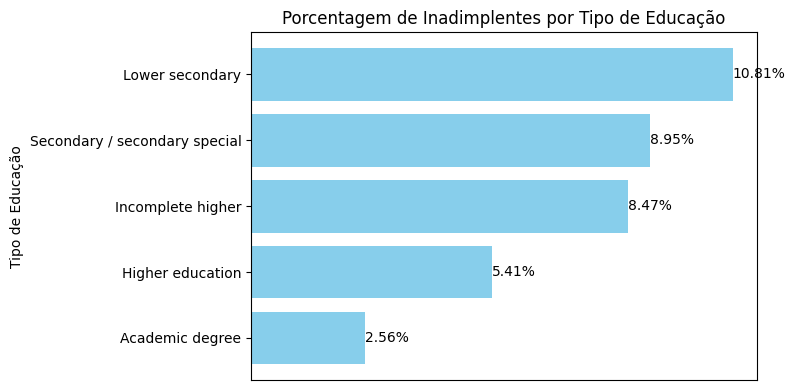

In [ ]:
# Converter o resultado da consulta em um DataFrame Pandas
df_pandas = df_educacao_target.toPandas()

# Filtrar apenas os clientes com TARGET 1 (inadimplentes)
df_pandas_target_1 = df_pandas[df_pandas['TARGET'] == 1]

# Ordenar o DataFrame pela coluna 'PORCENTAGEM' em ordem crescente
df_pandas_target_1 = df_pandas_target_1.sort_values(by='PORCENTAGEM')

# Criar o gráfico de barras horizontais
plt.figure(figsize=(8,4))
barras = plt.barh(df_pandas_target_1['NAME_EDUCATION_TYPE'], df_pandas_target_1['PORCENTAGEM'], color='skyblue')

# Adicionar a porcentagem como rótulo em cada barra
for barra in barras:
    width = barra.get_width()
    plt.text(width, barra.get_y() + barra.get_height()/2, f'{width}%', ha='left', va='center')

# Adicionar rótulos e título
plt.ylabel('Tipo de Educação')
plt.title('Porcentagem de Inadimplentes por Tipo de Educação')

# Remover os números do eixo x
plt.xticks([])

# Exibir o gráfico
plt.tight_layout()
plt.show()




Com a visualização do gráfico que indica a porcentagem de inadimplentes dentro de cada nível de educação, observamos que quase 11% dos clientes que possuem ensino fundamental (Lower secondary) estão inadimplentes. Além disso, tanto o ensino médio (Secondary / secondary special) quanto o superior incompleto (Incomplete higher) apresentam quase 9% de inadimplentes. Mesmo com a quantidade de clientes com ensino fundamental sendo pequena, uma boa parcela está inadimplente.

###Análise da Variavel Quantidade de Membros na Família

In [ ]:
spark.sql("""
select
    round(avg(CNT_FAM_MEMBERS),2) as MEDIA_MEMBROS_FAMILIA,
    min(CNT_FAM_MEMBERS) as MIN_MEMBROS_FAMILIA,
    max(CNT_FAM_MEMBERS) as MAX_MEMBROS_FAMILIA
from
    df_application_train_01
""").show()

+---------------------+-------------------+-------------------+
|MEDIA_MEMBROS_FAMILIA|MIN_MEMBROS_FAMILIA|MAX_MEMBROS_FAMILIA|
+---------------------+-------------------+-------------------+
|                 2.15|                1.0|               20.0|
+---------------------+-------------------+-------------------+



####Análise da Relação da Quantidade de Membros na Família com o  Target

In [28]:
spark.sql("""
select
    TARGET,
    CNT_FAM_MEMBERS as QUANT_MEMBROS,
    count(*) as QUANT_CLIENTES
from
    df_application_train_01
group by
    TARGET,
    CNT_FAM_MEMBERS
order by
    QUANT_CLIENTES;
""").show()

+------+-------------+--------------+
|TARGET|QUANT_MEMBROS|QUANT_CLIENTES|
+------+-------------+--------------+
|     0|         16.0|             1|
|     0|         15.0|             1|
|     1|         10.0|             1|
|     0|         20.0|             1|
|     0|         10.0|             1|
|     0|         NULL|             1|
|     1|         13.0|             1|
|     1|         11.0|             1|
|     0|         12.0|             2|
|     1|          7.0|             2|
|     1|          8.0|             3|
|     0|          9.0|             4|
|     0|          8.0|            10|
|     1|          6.0|            36|
|     0|          7.0|            51|
|     1|          5.0|           233|
|     0|          6.0|           237|
|     1|          4.0|          1511|
|     0|          5.0|          2156|
|     1|          3.0|          3269|
+------+-------------+--------------+
only showing top 20 rows



A maioria dos clientes tem um número moderado de membros na família, com uma distribuição mais concentrada em torno de 3 a 5 membros.

Observa-se que há uma quantidade significativa de clientes inadimplentes em famílias com um número menor de membros entre 3 e 5 por exemplo.

###Análise da Variável Valor do Crédito

In [ ]:
spark.sql("""
select
  round(avg(AMT_CREDIT),2) as MEDIA_CREDITO,
  round(min(AMT_CREDIT),2) as MIN_CREDITO,
  round(max(AMT_CREDIT),2) as MAX_CREDITO
from
  df_application_train_01
""").show()

+-------------+-----------+-----------+
|MEDIA_CREDITO|MIN_CREDITO|MAX_CREDITO|
+-------------+-----------+-----------+
|     599496.0|    45000.0|  4050000.0|
+-------------+-----------+-----------+



#### Análise por Faixa dos Valores de Crédito e o Target



In [40]:
df_faixa_credito_target = spark.sql("""
select
    TARGET,
    case
        when AMT_CREDIT >= 0 and AMT_CREDIT < 100000 then '0-100k'
        when AMT_CREDIT >= 100000 and AMT_CREDIT < 200000 then '100k-200k'
        when AMT_CREDIT >= 200000 and AMT_CREDIT < 300000 then '200k-300k'
        when AMT_CREDIT >= 300000 and AMT_CREDIT < 400000 then '300k-400k'
        else '400k+'
    end as FAIXA_CREDITO,
    count(*) as QUANT_CLIENTES
from
    df_application_train_01
group by
    TARGET,
    FAIXA_CREDITO
order by
    TARGET,
    FAIXA_CREDITO
""")

df_faixa_credito_target.show()

+------+-------------+--------------+
|TARGET|FAIXA_CREDITO|QUANT_CLIENTES|
+------+-------------+--------------+
|     0|       0-100k|          3977|
|     0|    100k-200k|         19593|
|     0|    200k-300k|         35449|
|     0|    300k-400k|         16535|
|     0|        400k+|        122291|
|     1|       0-100k|           236|
|     1|    100k-200k|          1500|
|     1|    200k-300k|          3041|
|     1|    300k-400k|          1835|
|     1|        400k+|         10800|
+------+-------------+--------------+



A maioria dos clientes, tanto do target 0 quanto do target 1, está na faixa de crédito de 400k+.

Para o target 0, a segunda faixa de crédito mais comum é a faixa de 200k-300k, seguida pela faixa de 100k-200k.

Para o target 1, a segunda faixa de crédito mais comum é a faixa de 400k+, seguida pela faixa de 200k-300k.


###Análise da Varável valor do Crédito por Faixas de Renda

Por meio da consulta Spark SQL, segmentei os clientes em diferentes faixas de renda, que variam de "Até 50.000" a "Mais de 200.000". Para cada faixa de renda, calculei a média, o mínimo e o máximo dos valores de crédito concedidos.

In [48]:
df_credito_renda = spark.sql("""
select
   case
      when AMT_INCOME_TOTAL <=  50000 then 'Faixa 1: Até 50.000'
      when AMT_INCOME_TOTAL <= 100000 then 'Faixa 2: 50.001 - 100.000'
      when AMT_INCOME_TOTAL <= 150000 then 'Faixa 3: 100.001 - 150.000'
      when AMT_INCOME_TOTAL <= 200000 then 'Faixa 4: 150.001 - 200.000'
      else 'Faixa 5: Mais de 200.000'
    end  as FAIXA_RENDA,
      round(avg(AMT_CREDIT), 2) as MEDIA_CREDITO,
      round(min(AMT_CREDIT), 2) as MIN_CREDITO,
      round(max(AMT_CREDIT), 2) as MAX_CREDITO
from
    df_application_train_01
group by
    case
      when AMT_INCOME_TOTAL <=  50000 then 'Faixa 1: Até 50.000'
      when AMT_INCOME_TOTAL <= 100000 then 'Faixa 2: 50.001 - 100.000'
      when AMT_INCOME_TOTAL <= 150000 then 'Faixa 3: 100.001 - 150.000'
      when AMT_INCOME_TOTAL <= 200000 then 'Faixa 4: 150.001 - 200.000'
      else 'Faixa 5: Mais de 200.000'
    end
order by
   FAIXA_RENDA;
""")
df_credito_renda.show()

+--------------------+-------------+-----------+-----------+
|         FAIXA_RENDA|MEDIA_CREDITO|MIN_CREDITO|MAX_CREDITO|
+--------------------+-------------+-----------+-----------+
| Faixa 1: Até 50.000|    295648.85|    45000.0|  2215224.0|
|Faixa 2: 50.001 -...|    393857.73|    45000.0|  2517300.0|
|Faixa 3: 100.001 ...|    521020.04|    45000.0|  2517300.0|
|Faixa 4: 150.001 ...|    635453.73|    45000.0|  2980521.0|
|Faixa 5: Mais de ...|    809149.07|    45000.0|  4050000.0|
+--------------------+-------------+-----------+-----------+



####Visualização da Variável Valor do Credito por Faixa de Renda

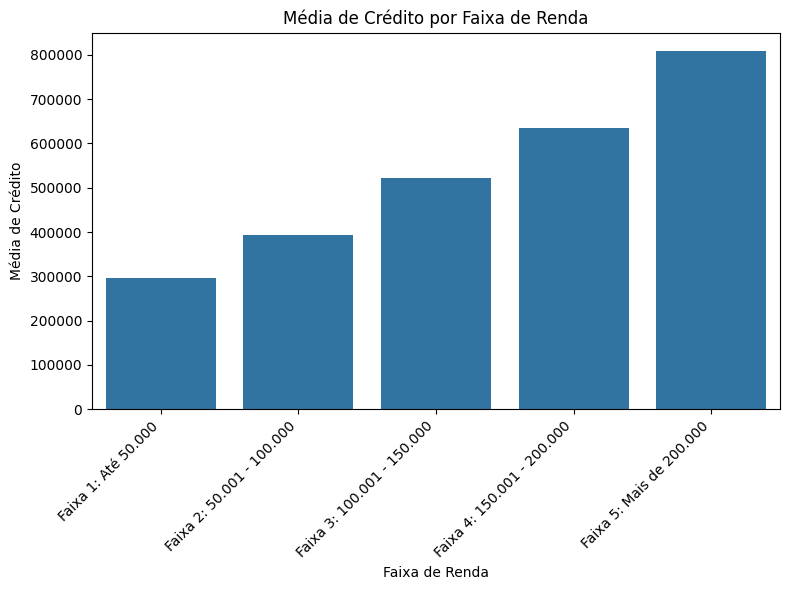

In [49]:
# Converter os resultados da consulta para um DataFrame Pandas
df_credito_renda_pandas = df_credito_renda.toPandas()

# Configurar o gráfico de barras
plt.figure(figsize=(8, 6))

sns.barplot(data=df_credito_renda_pandas, x='FAIXA_RENDA', y='MEDIA_CREDITO')
plt.title('Média de Crédito por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média de Crédito')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Observa-se que, em geral, o valor médio do crédito aumenta à medida que a faixa de renda aumenta.

Embora exista um aumento geral no valor médio do crédito à medida que a faixa de renda aumenta, a variação nos valores mínimos e máximos de crédito é significativa dentro de cada faixa de renda.

###Análise da Parcela Mensal do Crédito

In [11]:
spark.sql("""
select
  round(avg(AMT_ANNUITY)/12,2) as MED_PARC_MENSAL,
  round(min(AMT_ANNUITY)/12,2) as MIN_PARC_MENSAL,
  round(max(AMT_ANNUITY)/12,2) as MAX_PARC_MENSAL
from
  df_application_train_01
""").show()

+---------------+---------------+---------------+
|MED_PARC_MENSAL|MIN_PARC_MENSAL|MAX_PARC_MENSAL|
+---------------+---------------+---------------+
|        2259.97|         134.63|       21502.13|
+---------------+---------------+---------------+



###Análise da Variável Tipo de Renda do Cliente

In [24]:
spark.sql("""
select
  NAME_INCOME_TYPE,
  count(*) as TIPO_RENDA,
  round((count(*) / sum(count(*)) over()) * 100,2) as PORCENTAGEM
from
  df_application_train_01
group by
  NAME_INCOME_TYPE
order by
  TIPO_RENDA
""").show()

+--------------------+----------+-----------+
|    NAME_INCOME_TYPE|TIPO_RENDA|PORCENTAGEM|
+--------------------+----------+-----------+
|     Maternity leave|         2|        0.0|
|         Businessman|         8|        0.0|
|             Student|        14|       0.01|
|          Unemployed|        16|       0.01|
|       State servant|     15207|       7.06|
|           Pensioner|     38709|      17.98|
|Commercial associate|     50219|      23.33|
|             Working|    111082|       51.6|
+--------------------+----------+-----------+



####Análise da Variável Tipo de Renda e a Relação com Target

In [15]:
df_renda_target = spark.sql("""
select
  TARGET,
  NAME_INCOME_TYPE as TIPO_RENDA,
  count(*) as QUANT_CLIENTES
from
  df_application_train_01
group by
  TARGET,
  NAME_INCOME_TYPE
order by
  QUANT_CLIENTES;
""")
df_renda_target.show()

+------+--------------------+--------------+
|TARGET|          TIPO_RENDA|QUANT_CLIENTES|
+------+--------------------+--------------+
|     1|     Maternity leave|             1|
|     0|     Maternity leave|             1|
|     1|          Unemployed|             6|
|     0|         Businessman|             8|
|     0|          Unemployed|            10|
|     0|             Student|            14|
|     1|       State servant|           877|
|     1|           Pensioner|          2091|
|     1|Commercial associate|          3812|
|     1|             Working|         10625|
|     0|       State servant|         14330|
|     0|           Pensioner|         36618|
|     0|Commercial associate|         46407|
|     0|             Working|        100457|
+------+--------------------+--------------+



####Visualização da Variável Tipo de Renda e o Target

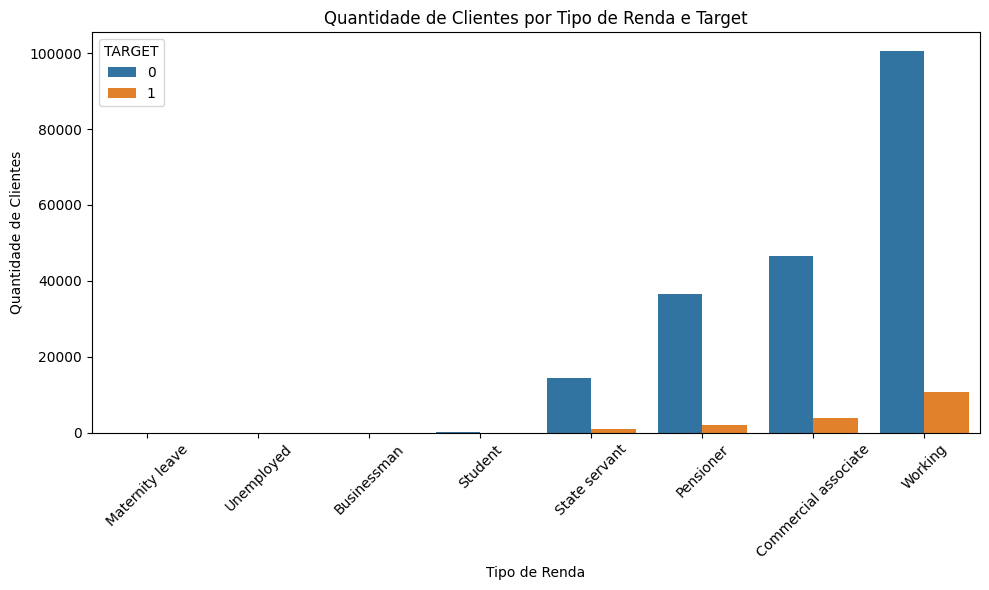

In [17]:
# Converta os resultados para um DataFrame pandas
df_pandas = df_renda_target.toPandas()

# Crie o gráfico de barras agrupado
plt.figure(figsize=(10, 6))
sns.barplot(data=df_pandas, x='TIPO_RENDA', y='QUANT_CLIENTES', hue='TARGET')

# Adicione rótulos e título
plt.xlabel('Tipo de Renda')
plt.ylabel('Quantidade de Clientes')
plt.title('Quantidade de Clientes por Tipo de Renda e Target')

# Mostrar o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='TARGET')
plt.show()

A maioria dos clientes pertence ao grupo "Working" tanto para target 0 quanto para target 1.

A segunda maior quantidade de clientes inadimplentes (target 1) é dos que têm a ocupação de "Commercial associate".

Clientes com ocupações como "State servant" e "Pensioner" têm menos chances de serem inadimplentes em comparação com outras ocupações.

Há uma quantidade muito pequena de clientes com ocupações especiais como "Maternity leave", "Unemployed" e "Businessman", e o número de inadimplentes dentro desses grupos também é baixo.

###Análise da Variável Pontuação de Fonte de Dados Externos

In [ ]:
spark.sql("""
select
    avg(EXT_SOURCE_1) as media_EXT_SOURCE_1,
    avg(EXT_SOURCE_2) as media_EXT_SOURCE_2,
    avg(EXT_SOURCE_3) as media_EXT_SOURCE_3,
    max(EXT_SOURCE_1) as max_EXT_SOURCE_1,
    max(EXT_SOURCE_2) as max_EXT_SOURCE_2,
    max(EXT_SOURCE_3) as max_EXT_SOURCE_3,
    min(EXT_SOURCE_1) as min_EXT_SOURCE_1,
    min(EXT_SOURCE_2) as min_EXT_SOURCE_2,
    min(EXT_SOURCE_3) as min_EXT_SOURCE_3
from
df_application_train_01

""").show()

+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+
|media_EXT_SOURCE_1|media_EXT_SOURCE_2|media_EXT_SOURCE_3|  max_EXT_SOURCE_1|  max_EXT_SOURCE_2|  max_EXT_SOURCE_3|  min_EXT_SOURCE_1|    min_EXT_SOURCE_2| min_EXT_SOURCE_3|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+
|0.5023237059767551|0.5141921034667131|0.5110699709936147|0.9516239622079844|0.8549996664047012|0.8960095494948396|0.0145681324124455|8.173616518884397E-8|5.272652387098E-4|
+------------------+------------------+------------------+------------------+------------------+------------------+------------------+--------------------+-----------------+



####Correlação da Variável Pontuação de Fonte de Dados Externos com o Target

In [23]:
df_correlation = spark.sql("""
select
  corr(EXT_SOURCE_1, TARGET) as correlation_EXT_SOURCE_1,
  corr(EXT_SOURCE_2, TARGET) as correlation_EXT_SOURCE_2,
  corr(EXT_SOURCE_3, TARGET) as correlation_EXT_SOURCE_3
from
  df_application_train_01
""")
df_correlation.show()

+------------------------+------------------------+------------------------+
|correlation_EXT_SOURCE_1|correlation_EXT_SOURCE_2|correlation_EXT_SOURCE_3|
+------------------------+------------------------+------------------------+
|    -0.15491233954514788|     -0.1597761566994234|    -0.17989774535126316|
+------------------------+------------------------+------------------------+



 Esses resultados de correlação indicam uma relação fraca entre as variáveis EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 e o alvo TARGET, o que significa que essas variáveis não estão fortemente relacionadas à variável TARGET

###Visualização da Variável Pontuação de Fonte de Dados Externos

 Crie um histograma para cada variável EXT_SOURCE_1, EXT_SOURCE_2 e EXT_SOURCE_3. Os histogramas ajudam a visualizar a distribuição de cada variável.

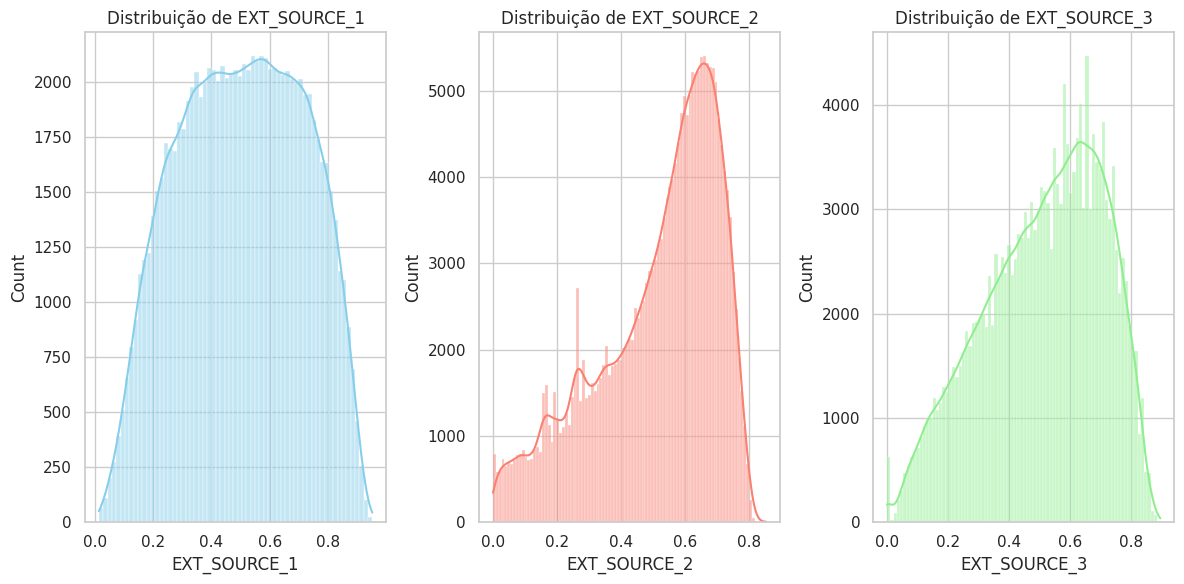

In [21]:
# Definir o estilo do seaborn
sns.set(style="whitegrid")

# Definir o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Histograma para EXT_SOURCE_1
plt.subplot(1, 3, 1)
sns.histplot(data=df_application_train_01, x='EXT_SOURCE_1', kde=True, color='skyblue')
plt.title('Distribuição de EXT_SOURCE_1')

# Histograma para EXT_SOURCE_2
plt.subplot(1, 3, 2)
sns.histplot(data=df_application_train_01, x='EXT_SOURCE_2', kde=True, color='salmon')
plt.title('Distribuição de EXT_SOURCE_2')

# Histograma para EXT_SOURCE_3
plt.subplot(1, 3, 3)
sns.histplot(data=df_application_train_01, x='EXT_SOURCE_3', kde=True, color='lightgreen')
plt.title('Distribuição de EXT_SOURCE_3')

# Mostrar os gráficos
plt.tight_layout()
plt.show()
